# Modcloth Exploratory Data Analysis

###Team 4: Yujia Cao, Ruchika Venkateswaran, Ryan Veytsman, Phoenix Wang, Amber Wu


Key Definitions:
- User Attribute: Average size that the user purchases 
- Model Attribute: Size of models shown to users in pictures/websites/ads
- Fit: Feedback on the fit of the clothing
- Size: Size of clothing ordered

## Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mod=pd.read_csv("modcloth.csv")

## Inspecting the Data

In [2]:
#viewing the first five rows
mod.head(5)

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [3]:
# inspecting the shape of the dataframe
mod.shape

(99893, 12)

In [4]:
# data types of mod
mod.dtypes

item_id         int64
user_id        object
rating          int64
timestamp      object
size          float64
fit            object
user_attr      object
model_attr     object
category       object
brand          object
year            int64
split           int64
dtype: object

In [5]:
# checking the number of missing values
mod.isnull().sum()

item_id           0
user_id           1
rating            0
timestamp         0
size          21760
fit           18506
user_attr      8367
model_attr        0
category          0
brand         73980
year              0
split             0
dtype: int64

In [6]:
# inspecting the dataframe 
mod.describe()

,item_id,rating,size,year,split
count,99893.000000,99893.000000,78133.000000,99893.000000,99893.000000
mean,83944.091208,4.209594,3.217322,2015.476450,0.358564
std,43558.135979,1.080633,1.885934,1.970262,0.720993
min,6454.000000,1.000000,0.000000,2010.000000,0.000000
25%,48629.000000,4.000000,2.000000,2014.000000,0.000000
50%,77878.000000,5.000000,3.000000,2016.000000,0.000000
75%,120126.000000,5.000000,4.000000,2017.000000,0.000000
max,155950.000000,5.000000,8.000000,2019.000000,2.000000


## Data Cleaning 

In [7]:
#removing missing values for size and user id
mod.dropna(subset=['size', 'user_id'], inplace = True)

In [8]:
#unique values for fit 
mod['fit'].unique()

array(['Just right', 'Slightly large', 'Slightly small', 'Very small',
       'Very large', nan], dtype=object)

In [9]:
# unique values for user attribute
mod['user_attr'].unique()

array(['Small', 'Large'], dtype=object)

In [10]:
# unique values for model attribute
mod['model_attr'].unique()

array(['Small', 'Small&Large'], dtype=object)

In [11]:
# after removing null values for size, we are only left with missing values for fit and brand
# since more than half of the dataset consists of missing values for brand, we won't be removing those observations 
mod.isnull().sum()

item_id           0
user_id           0
rating            0
timestamp         0
size              0
fit            7213
user_attr         0
model_attr        0
category          0
brand         59575
year              0
split             0
dtype: int64

In [12]:
# inspecting unique values of fit for each size
for i in mod['size'].unique():
    print('size', i)
    print(mod[mod['size'] == i].fit.unique())
    print('-------')

size 1.0
['Just right' 'Slightly small' 'Slightly large' 'Very large' 'Very small'
 nan]
-------
size 2.0
['Just right' 'Slightly small' 'Slightly large' 'Very large' 'Very small'
 nan]
-------
size 3.0
['Just right' 'Slightly large' 'Slightly small' 'Very small' 'Very large'
 nan]
-------
size 7.0
['Just right' 'Very small' 'Slightly small' 'Slightly large' 'Very large'
 nan]
-------
size 4.0
['Slightly small' 'Just right' 'Very small' 'Slightly large' 'Very large'
 nan]
-------
size 6.0
['Very small' 'Just right' 'Slightly small' 'Slightly large' 'Very large'
 nan]
-------
size 5.0
['Just right' 'Slightly large' 'Very small' 'Slightly small' 'Very large'
 nan]
-------
size 8.0
['Very small' 'Slightly small' 'Slightly large' 'Very large' 'Just right'
 nan]
-------
size 0.0
['Just right' 'Slightly large' 'Very large' 'Slightly small' nan]
-------


The above loop displays that all sizes have fit values ranging from small to large which does not provide an accurate representation of the user fit. An example is also provided below, where 104 users of size 8 have a 'very small' fit which is misleading.

## Exploratory Data Analysis 

In [13]:
# 104 users of size 8 have a 'very small' fit 
mod[(mod['size'] == 8) & (mod['fit'] == 'Very small')]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
1760,27590,Cattie,3,2012-02-26 08:00:00+00:00,8.0,Very small,Large,Small,Bottoms,NaN,2016,1
6417,7443,ericanrainey,1,2013-05-31 07:00:00+00:00,8.0,Very small,Large,Small,Dresses,NaN,2012,0
6818,7443,muneca0801,1,2013-06-20 07:00:00+00:00,8.0,Very small,Large,Small,Dresses,NaN,2012,0
6966,7443,Lorraine,4,2013-06-28 07:00:00+00:00,8.0,Very small,Large,Small,Dresses,NaN,2012,0
8016,27590,muelle_de_luz,5,2013-08-18 07:00:00+00:00,8.0,Very small,Large,Small,Bottoms,NaN,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77427,154538,Leannel,2,2017-10-14 07:00:00+00:00,8.0,Very small,Large,Small,Dresses,Banned,2017,0
93174,150043,Swedegirl,2,2018-08-13 20:51:00.358000+00:00,8.0,Very small,Large,Small&Large,Tops,NaN,2018,0
93871,36172,Sherman,1,2018-09-21 17:20:45.303000+00:00,8.0,Very small,Large,Small&Large,Tops,NaN,2016,2
96414,36172,Marlins,2,2018-12-10 03:51:36.779000+00:00,8.0,Very small,Large,Small&Large,Tops,NaN,2016,0


In [14]:
(mod[(mod['size'] == 8) & (mod['fit'] == 'Very small') & (mod['model_attr'] == 'Small')]).shape

(41, 12)

In [15]:
mod[(mod['size'] == 7) & (mod['fit'] == 'Very small')]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
344,7443,rachael.margarita,1,2011-02-24 08:00:00+00:00,7.0,Very small,Large,Small,Dresses,NaN,2012,0
1786,16411,Leeny,2,2012-02-29 08:00:00+00:00,7.0,Very small,Large,Small,Dresses,NaN,2011,0
2236,16411,jcpollutra,1,2012-05-22 07:00:00+00:00,7.0,Very small,Large,Small,Dresses,NaN,2011,0
6482,21296,milonde,3,2013-06-05 07:00:00+00:00,7.0,Very small,Large,Small,Bottoms,ModCloth,2013,0
7246,21296,dani_elley05,2,2013-07-12 07:00:00+00:00,7.0,Very small,Large,Small,Bottoms,ModCloth,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98023,32134,MarathonMama,5,2019-02-04 17:54:59.592000+00:00,7.0,Very small,Large,Small&Large,Dresses,NaN,2018,0
98113,32134,Raleigh,2,2019-02-07 05:20:41.316000+00:00,7.0,Very small,Large,Small&Large,Dresses,NaN,2018,0
98949,32134,Sewingmamaof3,5,2019-03-26 22:15:34.553000+00:00,7.0,Very small,Large,Small&Large,Dresses,NaN,2018,2
99065,133399,ny,1,2019-04-06 02:50:01.063000+00:00,7.0,Very small,Large,Small&Large,Bottoms,Miss Candyfloss,2016,0


In [16]:
(mod[(mod['size'] == 7) & (mod['fit'] == 'Very small') & (mod['model_attr'] == 'Small')]).shape

(156, 12)

In [17]:
mod[(mod['size'] == 1) & (mod['fit'] == 'Very large')]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
462,16411,releceb,1,2011-06-15 07:00:00+00:00,1.0,Very large,Small,Small,Dresses,NaN,2011,0
1210,16411,nerual86,5,2011-12-05 08:00:00+00:00,1.0,Very large,Small,Small,Dresses,NaN,2011,0
1410,31644,Lori,2,2012-01-03 08:00:00+00:00,1.0,Very large,Small,Small&Large,Dresses,NaN,2015,0
1698,22563,lauren,1,2012-02-18 08:00:00+00:00,1.0,Very large,Small,Small,Tops,NaN,2014,0
2337,22563,Venecia,3,2012-06-06 07:00:00+00:00,1.0,Very large,Small,Small,Tops,NaN,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
97213,140525,Ashley,3,2018-12-31 14:26:54.088000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2017,0
97214,146475,Ashley,5,2018-12-31 14:36:01.783000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2018,0
97295,143422,SF,3,2019-01-04 04:07:00.155000+00:00,1.0,Very large,Small,Small,Outerwear,NaN,2017,2
98765,27439,Chicago,3,2019-03-12 17:06:40.878000+00:00,1.0,Very large,Small,Small&Large,Outerwear,Steve Madden,2018,0


In [18]:
mod[(mod['size'] == 1) & (mod['fit'] == 'Very large') & (mod['model_attr'] == 'Small&Large')]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
1410,31644,Lori,2,2012-01-03 08:00:00+00:00,1.0,Very large,Small,Small&Large,Dresses,NaN,2015,0
2635,44893,Pooja,2,2012-07-22 07:00:00+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2012,0
2676,50818,Harmony,3,2012-07-29 07:00:00+00:00,1.0,Very large,Small,Small&Large,Bottoms,NaN,2016,0
2959,44261,Allie,4,2012-09-15 07:00:00+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2014,0
3199,49587,ModNicole,2,2012-10-02 07:00:00+00:00,1.0,Very large,Small,Small&Large,Dresses,NaN,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96651,144543,JDK,1,2018-12-14 17:06:20.477000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2019,0
97213,140525,Ashley,3,2018-12-31 14:26:54.088000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2017,0
97214,146475,Ashley,5,2018-12-31 14:36:01.783000+00:00,1.0,Very large,Small,Small&Large,Tops,NaN,2018,0
98765,27439,Chicago,3,2019-03-12 17:06:40.878000+00:00,1.0,Very large,Small,Small&Large,Outerwear,Steve Madden,2018,0


In [19]:
large = mod[(mod['user_attr'] == 'Large') & (mod['model_attr'] == 'Small')]
large[(large['user_attr'] == 'Large') & (large['model_attr'] == 'Small') & ((large['fit'] == 'Very small') | (large['fit'] == 'Slightly small'))]

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
310,16411,Sandrine,3,2011-02-09 08:00:00+00:00,6.0,Very small,Large,Small,Dresses,NaN,2011,0
344,7443,rachael.margarita,1,2011-02-24 08:00:00+00:00,7.0,Very small,Large,Small,Dresses,NaN,2012,0
439,16411,smaksimo,3,2011-06-08 07:00:00+00:00,7.0,Slightly small,Large,Small,Dresses,NaN,2011,0
451,21296,Symantha,4,2011-06-12 07:00:00+00:00,3.0,Slightly small,Large,Small,Bottoms,ModCloth,2013,0
469,16411,kathy.aaron,4,2011-06-16 07:00:00+00:00,7.0,Slightly small,Large,Small,Dresses,NaN,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96212,148234,funkychunkyfashion,4,2018-11-30 18:26:57.515000+00:00,5.0,Slightly small,Large,Small,Outerwear,ModCloth,2018,0
97833,150694,Linnae,4,2019-01-30 23:59:53.948000+00:00,6.0,Slightly small,Large,Small,Dresses,ModCloth,2019,0
98183,142524,hunter,2,2019-02-09 23:34:34.661000+00:00,6.0,Very small,Large,Small,Tops,NaN,2019,0
98186,143348,hunter,3,2019-02-10 00:01:31.563000+00:00,6.0,Slightly small,Large,Small,Tops,NaN,2018,2


In [20]:
large.shape

(6246, 12)

The model pictures used to demonstrate the clothes may cause misunderstanding to customers. People tend to buy smaller sizes when they are browsing cloths with small size model pictures. In contrast, people are more likely to buy larger sizes when they are given both the small and large size model pictures. For instance, for customers who wear size 8, almost 40% of the 'Very small' fit feedback provided with a small size model attribution picture. Similarly, for customers who wear size 7, almost 70% of the 'Very small' fit feedback provided with a small size model attribution picture. For customers who wear size 1, almost 55% of the 'Very large' fit feedback provided with both Small&Large model attribution pictures. 

After subsetting for only large users who are shown small sized models, we notice that 19.7% of large users have provided feedback that the sizing of the clothes is either very small or slightly small.

In [21]:
# a new dataframe has been created to only filter for features that will be used in EDA
df = mod[['item_id', 'user_id', 'size', 'user_attr', 'model_attr', 'category', 'fit']]
df.head(5)

,item_id,user_id,size,user_attr,model_attr,category,fit
119,7443,Mona,1.0,Small,Small,Dresses,Just right
121,11960,Devon,2.0,Small,Small&Large,Outerwear,Just right
123,11960,Cara,2.0,Small,Small&Large,Outerwear,Just right
125,11960,Hanaa,3.0,Small,Small&Large,Outerwear,Just right
129,16411,Cecilia,3.0,Small,Small,Dresses,Slightly large


In [22]:
df.shape

(78132, 7)

In [23]:
df.isnull().sum()

item_id          0
user_id          0
size             0
user_attr        0
model_attr       0
category         0
fit           7213
dtype: int64

In [24]:
df.groupby('user_attr').size()

user_attr
Large    16686
Small    61446
dtype: int64

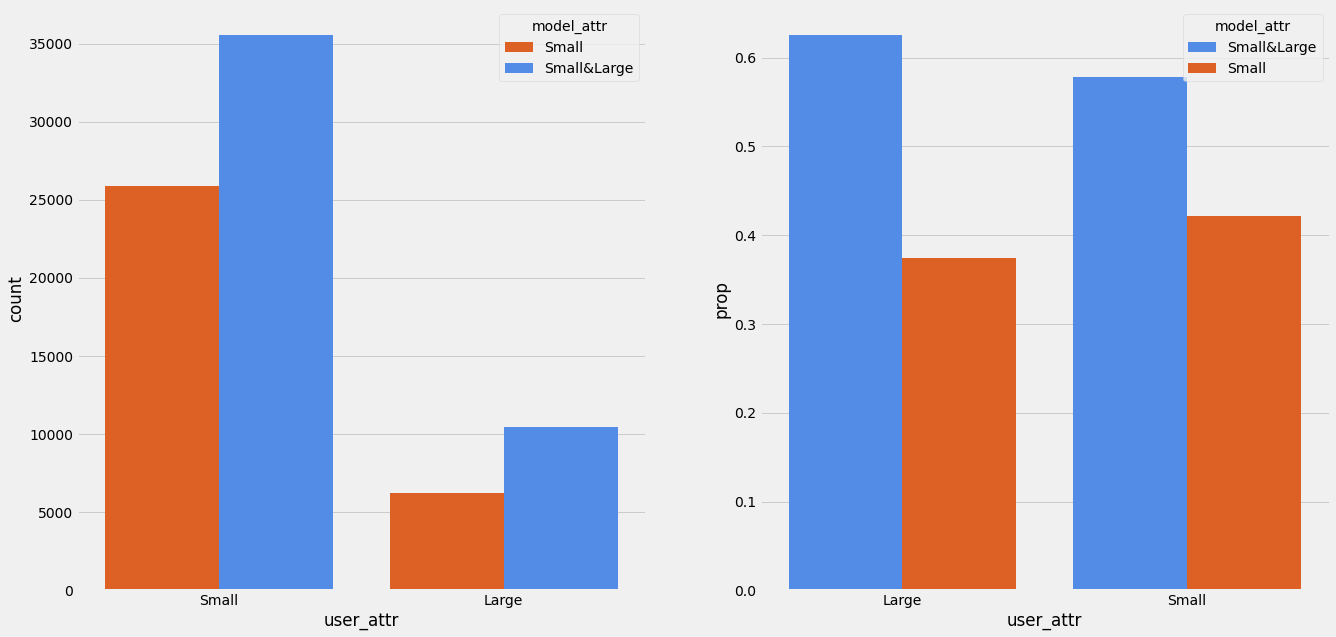

In [32]:
x, y, hue = "user_attr", "prop", "model_attr"
plt.style.use('fivethirtyeight')
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0], palette=["#fb5607", "#3a86ff"])
f.set_size_inches(20, 10)
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], palette=["#3a86ff", "#fb5607"])

- The table (crosstab) and bar charts above display the type of models shown to small and large sized users.
- In the second chart (bar graph with proportions), we notice that a higher proportion of large sized users are displayed 'small & large' sized models, while a higher proportion of small sized users are displayed 'small' sized models. This aligns with the findings from the paper as well.
- Around the 35% of large sized users are also shown small sized models. This might result in purchase of smaller sized clothing by large sized users. As displayed above while cleaning data, we observed that 19.7% of large users have provided feedback that the sizing of the clothes is either very small or slightly small, which means that displaying small sized models to large sized users could have influenced their purchasing decisions. 

In [26]:
# mod1=df.groupby(['user_attr','fit_of_user']).size()
# type(mod1)
# cross=mod1.to_frame()
# cross

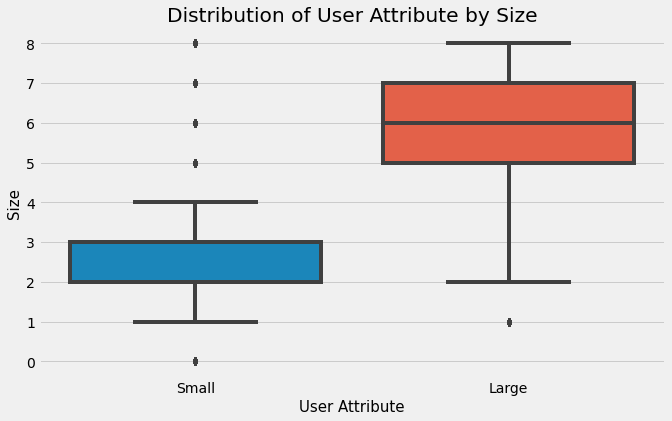

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.boxplot(y="size",x ='user_attr' ,data = df)
plt.title("Distribution of User Attribute by Size")
plt.xlabel('User Attribute',fontsize=15)
plt.ylabel("Size",fontsize=15)
plt.show()

The boxplot displays some outliers which indicates that users who on average purchase small sized clothing sometimes purchase clothing of larger sizes as well.

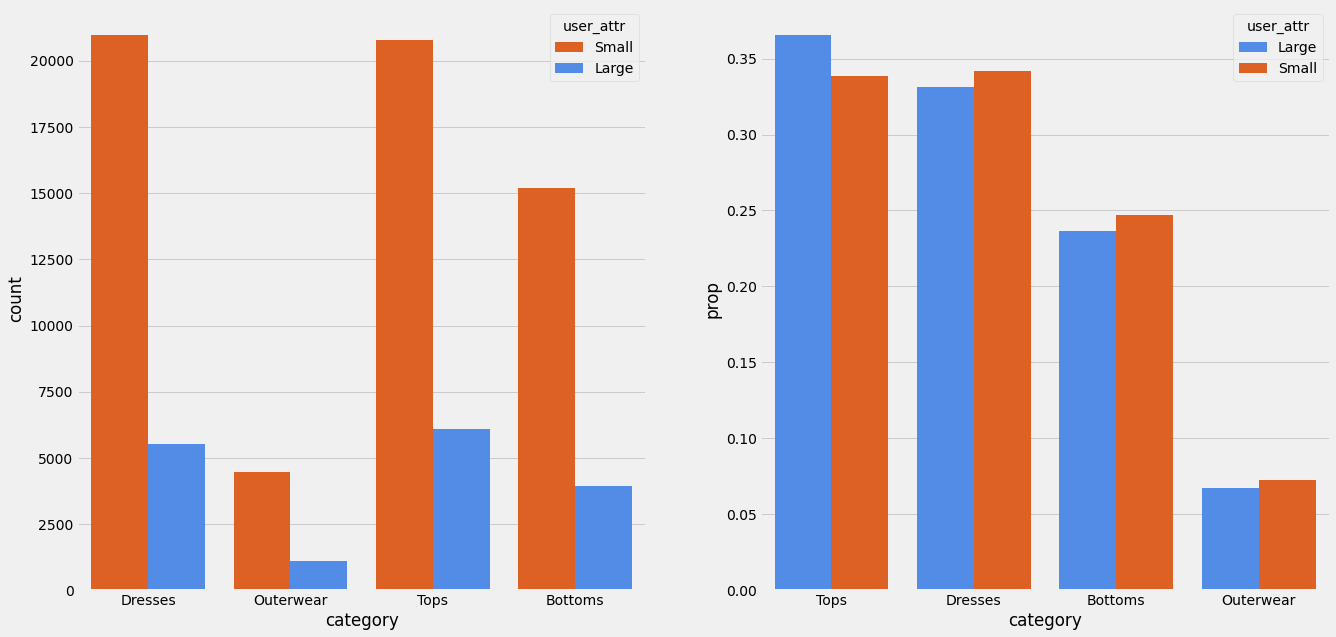

In [28]:
x, y, hue = "category", "prop", "user_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0], palette=["#fb5607", "#3a86ff"])
f.set_size_inches(20, 10)
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], palette=["#3a86ff", "#fb5607"])

- Small size users have higher preference in buying tops and dresses, but a larger proportion of large sized users (approximately 40% of large sized users) buy tops. 
- Both small and large sized users have lower preference of buying outerwear. 
- A slightly larger proportion of smaller sized users have bought bottoms. 

[Text(0, 0, 'Tops'),
 Text(0, 0, 'Dresses'),
 Text(0, 0, 'Bottoms'),
 Text(0, 0, 'Outerwear')]

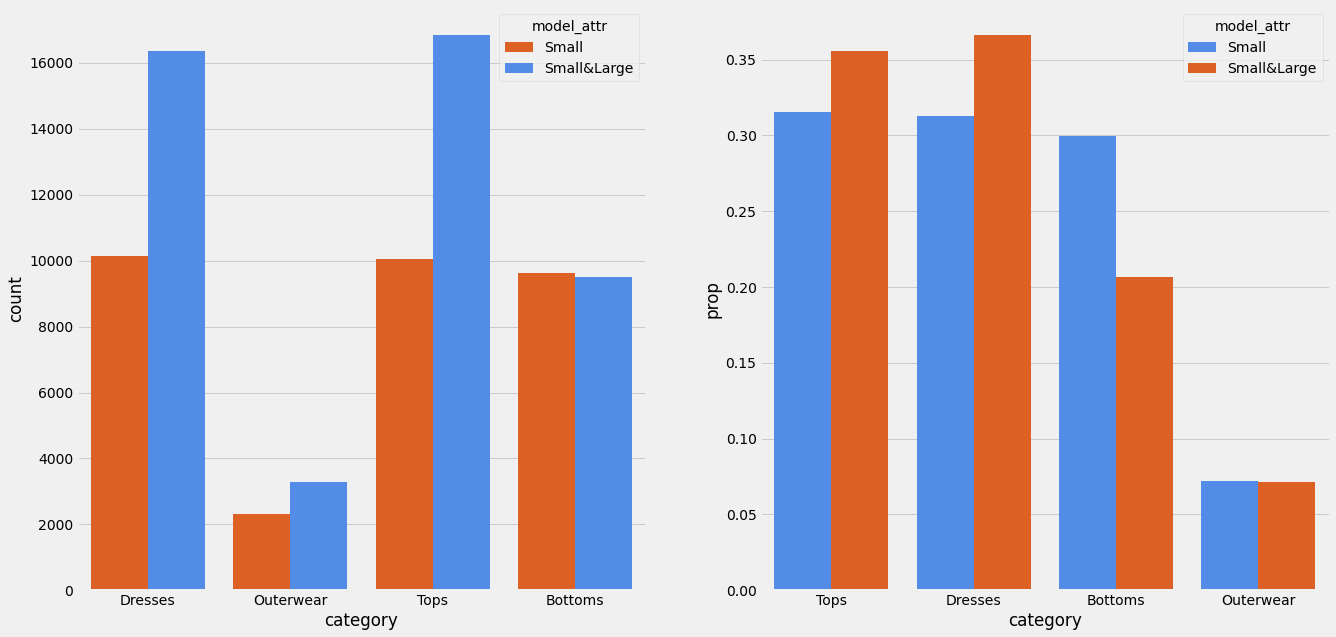

In [29]:
x, y, hue = "category", "prop", "model_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0], palette=["#fb5607", "#3a86ff"])
f.set_size_inches(20, 10)
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], palette=["#3a86ff", "#fb5607"])
axes[1].set_xticklabels(['Tops','Dresses','Bottoms','Outerwear'])

Almost 74% of the Small&Large size model images display within the tops and dresses categories, which explains why large sized users prefer to buy tops and dresses over the bottoms and outerwear. 

[Text(0, 0, 'Tops'),
 Text(0, 0, 'Dresses'),
 Text(0, 0, 'Bottoms'),
 Text(0, 0, 'Outerwear')]

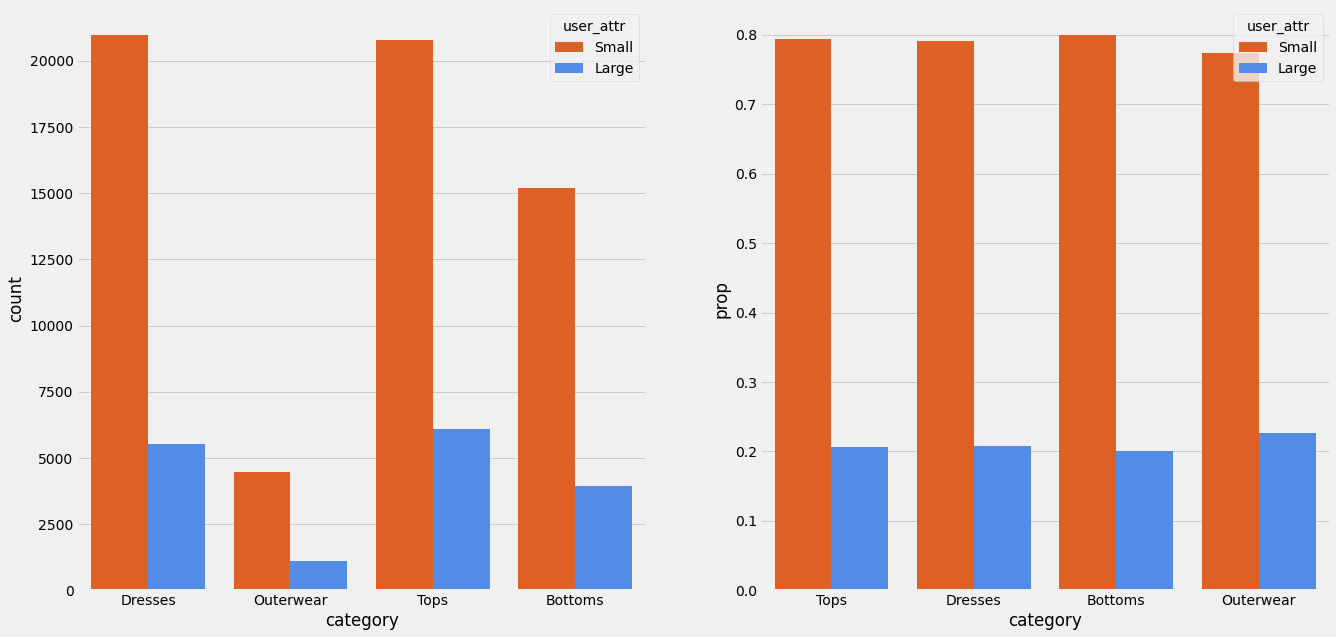

In [30]:
x, y, hue = "category", "prop", "user_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0], palette=["#fb5607", "#3a86ff"])
f.set_size_inches(20, 10)
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], palette=["#fb5607", "#3a86ff"])
axes[1].set_xticklabels(['Tops','Dresses','Bottoms','Outerwear'])

All cloth categories are overwhelmingly dominated by small size people. Almost 80% of the buyers are small size customers across all categories. The website should include more large size model pictures to attract more potential large size customers. 

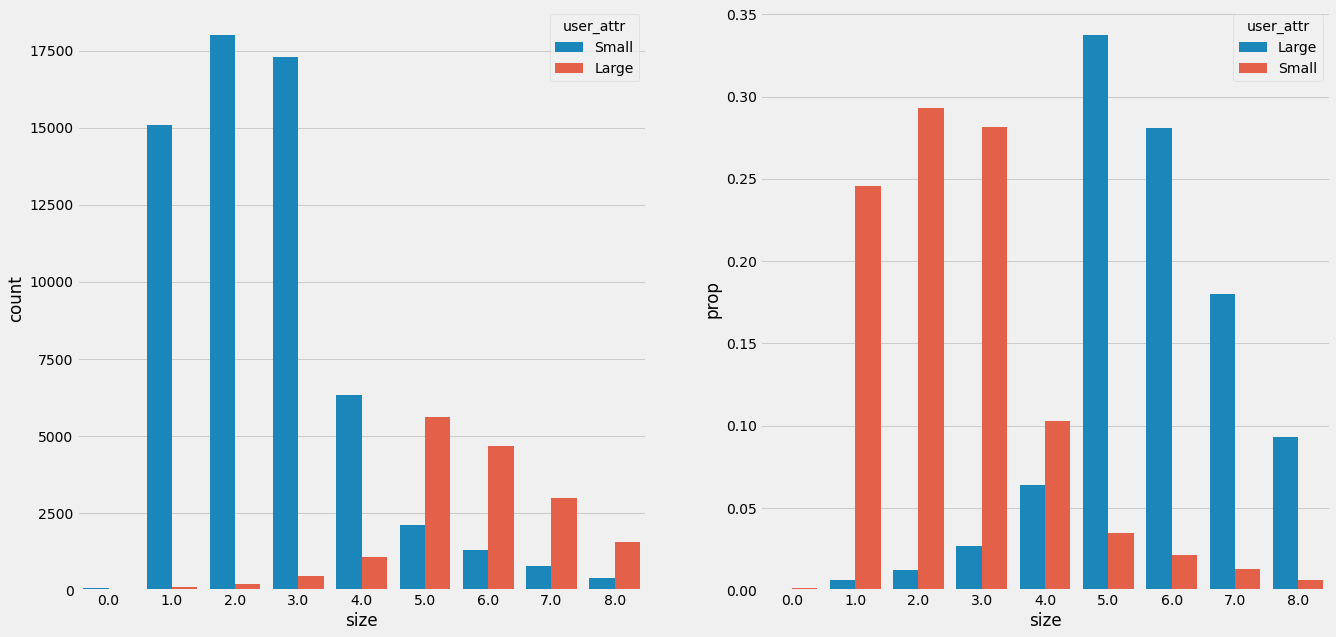

In [31]:
x, y, hue = "size", "prop", "user_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
f.set_size_inches(20, 10)
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

The above visualization displays that:
- The size purchased by large sized users mostly ranges between 5-8, but a small proportion of large sized users have also purchased clothes between size 0-4. 
- Majority of small sized users have purchased clothes between size 1-4. 